In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andhikasf","key":"42a1d0cfda66339d39179ebd8cfebf60"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/fetal-health-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 48.7MB/s]


In [4]:
!unzip fetal-health-classification.zip -d fetal-health-classification
!ls fetal-health-classification

Archive:  fetal-health-classification.zip
  inflating: fetal-health-classification/fetal_health.csv  
fetal_health.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate

In [6]:
data = pd.read_csv("/content/fetal-health-classification/fetal_health.csv")
data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [7]:
data.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [8]:
data.drop(columns=['baseline value','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accelerations                    2126 non-null   float64
 1   fetal_movement                   2126 non-null   float64
 2   uterine_contractions             2126 non-null   float64
 3   light_decelerations              2126 non-null   float64
 4   severe_decelerations             2126 non-null   float64
 5   prolongued_decelerations         2126 non-null   float64
 6   abnormal_short_term_variability  2126 non-null   float64
 7   fetal_health                     2126 non-null   float64
dtypes: float64(8)
memory usage: 133.0 KB


In [10]:
X = data.drop("fetal_health",axis=1)
y = pd.get_dummies(data.fetal_health)

In [11]:
X

accelerations  fetal_movement  uterine_contractions  \
0             0.000           0.000                 0.000   
1             0.006           0.000                 0.006   
2             0.003           0.000                 0.008   
3             0.003           0.000                 0.008   
4             0.007           0.000                 0.008   
...             ...             ...                   ...   
2121          0.000           0.000                 0.007   
2122          0.001           0.000                 0.007   
2123          0.001           0.000                 0.007   
2124          0.001           0.000                 0.006   
2125          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  
0                                73.0  
1                                17.0  
2                                16.0  
3                                16.0  
4                                16.0  
...                               ...  
2121                             79.0  
2122                             78.0  
2123                             79.0  
2124                             78.0  
2125                             74.0  

[2126 rows x 7 columns]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(2126, 7)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=42)

In [14]:
X_train.shape

(1913, 7)

In [15]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape= X_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [16]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 259 (1.01 KB)
Trainable params: 259 (1.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="rmsprop")
early_stop = keras.callbacks.EarlyStopping(patience=20)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,callbacks=early_stop)

Epoch 1/15
60/60 [==============================] - 1s 13ms/step - loss: 1.1423 - accuracy: 0.7820 - val_loss: 0.9241 - val_accuracy: 0.7465
Epoch 2/15
60/60 [==============================] - 0s 4ms/step - loss: 0.8295 - accuracy: 0.7820 - val_loss: 0.8603 - val_accuracy: 0.7465
Epoch 3/15
60/60 [==============================] - 0s 3ms/step - loss: 0.8053 - accuracy: 0.7820 - val_loss: 0.8932 - val_accuracy: 0.7465
Epoch 4/15
60/60 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.7820 - val_loss: 0.8730 - val_accuracy: 0.7465
Epoch 5/15
60/60 [==============================] - 0s 3ms/step - loss: 0.7725 - accuracy: 0.7820 - val_loss: 0.8096 - val_accuracy: 0.7465
Epoch 6/15
60/60 [==============================] - 0s 6ms/step - loss: 0.7566 - accuracy: 0.7820 - val_loss: 0.7767 - val_accuracy: 0.7465
Epoch 7/15
60/60 [==============================] - 0s 6ms/step - loss: 0.7380 - accuracy: 0.7820 - val_loss: 0.8270 - val_accuracy: 0.7465
Epoch 8/15
60/60 [=

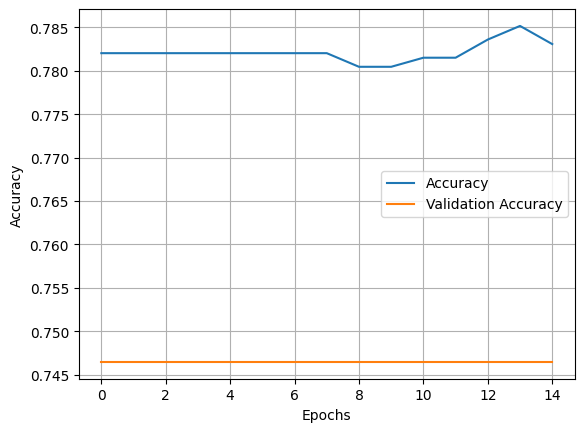

In [19]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

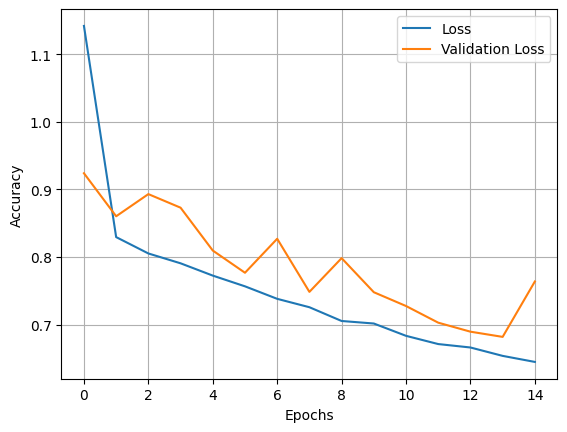

In [20]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [21]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

7/7 [==============================] - 0s 3ms/step


In [22]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7464788732394366


In [23]:
model.save('./fetal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model = tf.keras.models.load_model('./fetal.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./fetal.tflite", "wb").write(tflite_model)

3132